# Ablation Analysis

In [33]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ls ../pruebas/pruebas/

1_ResNet2d/  C1D_C2D/  no_ResNet1d/  no_ResNet1d_FF/  no_ResNet2d/  original/


In [25]:
ablations_path = '../pruebas/pruebas/'
dfs = {}
folders = os.listdir(ablations_path)
for folder in folders:
    df_temp = pd.read_csv(ablations_path+folder+'/train_log.csv')
    df_temp['ablation'] = folder
    dfs[folder] = df_temp
    
df = pd.DataFrame(columns=df_temp.columns)
for folder in folders:
    df = pd.concat([df, dfs[folder]])  

In [26]:
df

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation
0,0,0.0002,0.1727,0.0000,0.0000,0.2271,1_ResNet2d
1,1,0.0000,0.1579,0.0000,0.0000,0.2319,1_ResNet2d
2,2,0.0000,0.1369,0.0000,0.0000,0.2004,1_ResNet2d
3,3,0.0000,0.0961,0.0000,0.0000,0.1708,1_ResNet2d
4,4,0.0198,0.0655,0.0556,0.0556,0.1565,1_ResNet2d
5,5,0.1438,0.0544,0.2821,0.2105,0.1578,1_ResNet2d
0,0,0.0148,0.8448,0.0000,0.0000,0.4140,C1D_C2D
1,1,0.0014,0.3265,0.0000,0.0000,0.1648,C1D_C2D
2,2,0.0000,0.1865,0.0000,0.0000,0.0991,C1D_C2D
3,3,0.0000,0.1203,0.0000,0.0000,0.0839,C1D_C2D


In [28]:
df_last_epoch = df.query('epoch == 5')

## Lost analysis

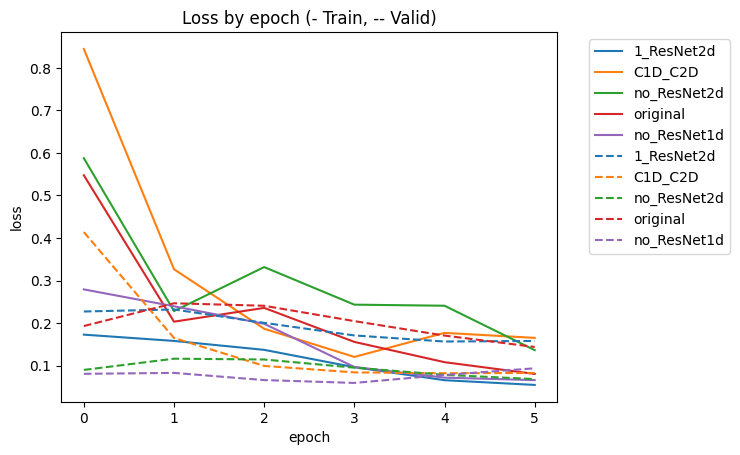

In [41]:
# fig = sns.scatterplot(data=df, x='e', y='train_loss', hue='epoch')
sns.lineplot(data=df, x='epoch', y='train_loss', hue='ablation')
sns.lineplot(data=df, x='epoch', y='valid_loss', hue='ablation', linestyle='--')
plt.ylabel('loss')
plt.title('Loss by epoch (- Train, -- Valid)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## F1 plots 

Debido a los pocos datos de entrenamiento, grafico los valores de F1 y F1 post. En realidad deberia promediarse teniendo en cuenta mayores conjuntos de test. 

<Axes: xlabel='ablation', ylabel='valid_f1'>

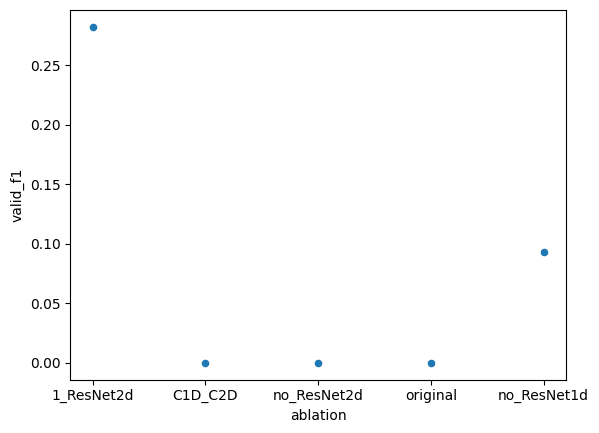

In [31]:
df_last_epoch.plot(x='ablation', y='valid_f1', kind='scatter')

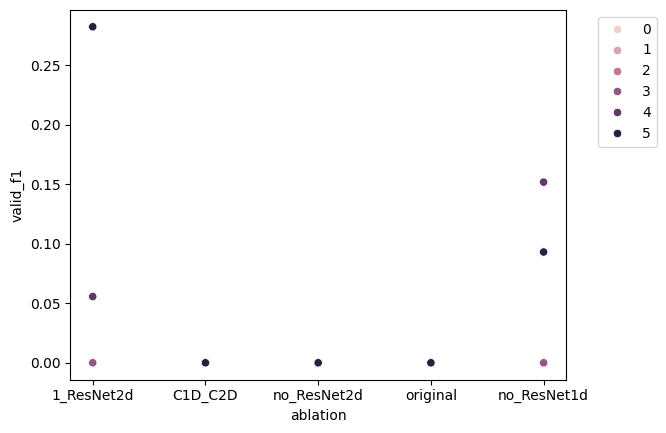

In [34]:

fig = sns.scatterplot(data=df, x='ablation', y='valid_f1', hue='epoch')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


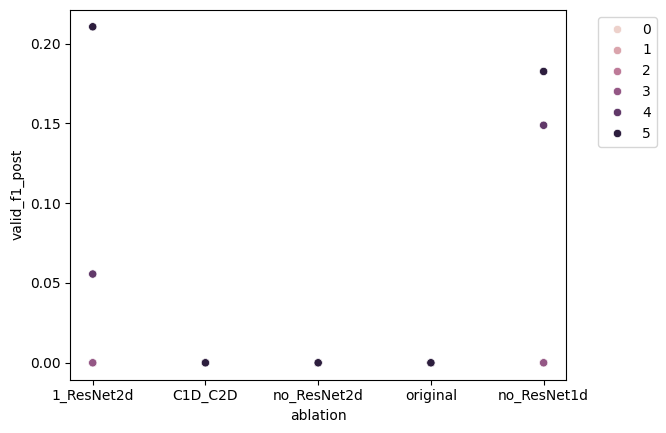

In [35]:
fig = sns.scatterplot(data=df, x='ablation', y='valid_f1_post', hue='epoch')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
